# Blackwell's Customer Behaviour Report


### Author: [Mauricio Amoni](https://www.linkedin.com/in/mauricio-amoni-guerrero-9a1901217/)

## Table of Contents

* [0. Importing packages and auxiliary functions](#section0)
* [1. Introduction](#section1)
* [2. Data Collection](#section2)
* [3. Data Cleaning and Preparation](#section3)
    * [3.1. Missing Values](#subsection31)
    * [3.2. Duplicates](#subsection32)
    * [3.3. Initial description and possible outliers](#subsection33)
    * [3.4. Other features](#subsection34)
* [4. Exploratory Data Analysis](#section4)
    * [4.1. Region specific EDA](#subsection41)
    * [4.2. EDA on number of items bought per purchase](#subsection42)
    * [4.3. Correlation coefficients supporting hypotheses](#subsection43)
*[5. In-Depth Analysis with ML models](#section5)
    * [5.1. `region` as dependent variable](#subsection51)
    * [5.2. `age` as dependent variable](#subsection52)
    * [5.3. `in-store` as dependent variable](#subsection53)
    * [5.4 `amount` as dependent variable](#subsection54)
* [6. Conclusion](#section6)


## 0. Importing packages and auxiliary functions <a class="anchor" id="section0"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from tqdm import tqdm
import warnings

#sns.set_style(style = 'darkgrid')
warnings.simplefilter('ignore')

In [2]:
# Auxiliary function for labelling figures

fig_count = 0

def fig_label(text, adj=0, size = 14):
    global fig_count
    fig_count+= 1
    # Bold text number
    figure_txt =  r'$\bf{' + f' {fig_count}.'+ '}$'
    # Complete label
    label = r'$\bf{Figure}$ ' + figure_txt + text
    # Include label in the figure
    plt.figtext(0.5,-0.05 + adj, s=label, size = size, ha = 'center')

## 1. Introduction <a class="anchor" id="section1"></a>

Blackwell Electronics is consumer electronics retailer in the southeastern United States. This is a report on Blackwell Electronics’ customer behaviour through the data of their transactions.

In this report we are interested in two sets of business problems:

- **SET 1**:
    - Do customers in different regions spend more per transaction?
    - Which regions spend the most/least?
    - Is there a relationship between number of items purchased and amount spent?


- **SET 2**:
    - Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?
    - Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?


We will also include further insights from the data we get from exploratory data analysis and machine learning models, other insights from the data.

The rest of the report will be structured as follows.

- In Section 2 we will import and describe the main components of data, including a data dictionary.
- In Section 3 we will look for missing values, duplicates and outliers on the data provided and remove or transform unreliable data. To do so we will already perform some brief visualizations to decide which data points can be considered outliers.
- In Section 4 we will perform more in-depth EDA taking into account segmenting with several categorical variables.
- In Section 5 we will use Machine Learning models to infer deeper relationships in the data and and see if we can have some predictive power on customer beahviour.
- Finally on Section 6 we conclude the report by summarizing some of the key findings of the previous sections.

## 2. Data Collection <a class="anchor" id="section2"></a>

We have been provided with the data of transactions of Blackwell Electronics which we import as follows.

In [3]:
data = pd.read_csv('Demographic_Data.csv')

We describe the columns in the data:

In [4]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

The columns above have the following meaning:

| column | Meaning | Legend |
|:---:|:---:|:---:|
|`in-store`| Wether the transaction<br> occurred in-store or online| 0 = Online<br>1 = In-store|
| `age`| Customer's age when transaction occurred|| 
| `items` | Number of items bought in the transaction||
| `amount`| Amount in dollars of the transaction| | 
| `region`| Region where the transaction occurred |1 = North<br>2 = South<br>3= East<br>4 = West|  

We can visualize the first rows of the data as follows.

In [5]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [6]:
# Number of rows and columns
data.shape

(80000, 5)

## 3. Data Cleaning and Preparation <a class="anchor" id="section3"></a>

### 3.1. Missing values <a class="anchor" id="subsection31"></a>

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


The data does not have missing values. All columns are given as numeric values.

### 3.2. Duplicates <a class="anchor" id="subsection32"></a>

The data does not have specific information of time distinction of each purchase or purchase ID. Without this information, it is difficult to know if the duplicate rows in the dataset are really duplicates or if they are similar transactions with the same data by chance. We *strongly recommend* Blackwells data managers include unique identifiers in transactions for future analysis.

In [85]:
duplicates = data[data.duplicated()] # rows in the dataset with same entries as previous rows
print("Total of duplicated records: " + str(len(duplicates)))

Total of duplicated records: 21


In [86]:
display(duplicates)

,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


There are 21 identical records and we have unsufficient knowledge (no timestaps nor transaction IDs) to tell whether they are duplicates or not.\
Possible hypotheses:
* **Result of data aggregation from multiple sources** - highly probable
* **They are not duplicates, but a coincidence (someone made two identical transactions or two customers of the same age and from the same region made identical transactions)** - probable but only if number of items purchased is small (1, maybe 2) - otherwise extremely unlikely

We would like to act on a more probable hypothesis (data aggregation issue), so we assume that repeated records are duplicates and we drop them.\
What if there were many more identical records? We would consider leaving only records with number of items purchased equal to 1 or 2 provided that they constituted the majority of all identical records - otherwise they are completely unrealistic.

In [87]:
data = data.drop_duplicates

### 3.3. Initial description of the data and possible outliers <a class="anchor" id="subsection33"></a>

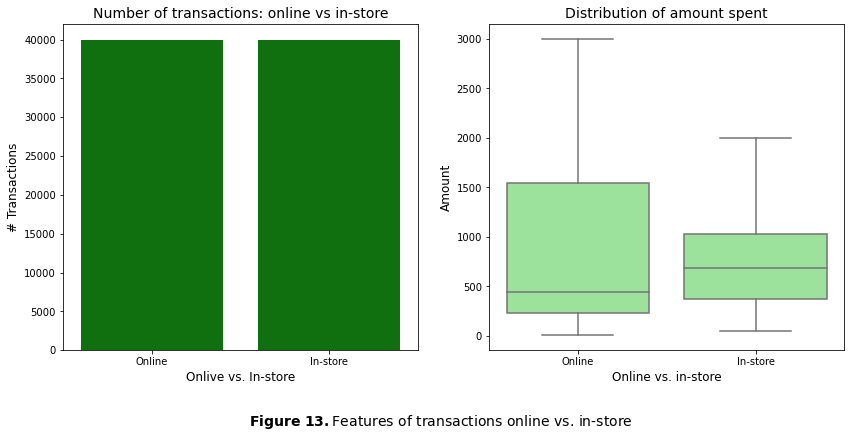

In [23]:
# Transactions online vs in-store

fig, (ax_ct, ax_box) = plt.subplots(1,2, figsize=(14,6)) 

sns.countplot(data=data, x='in-store', ax=ax_ct,color='green')
ax_ct.set_title('Number of transactions: online vs in-store', size = 14)
ax_ct.set_xticklabels(['Online', 'In-store'])
ax_ct.set_xlabel('Onlive vs. In-store', size = 12)
ax_ct.set_ylabel('# Transactions', size = 12)

sns.boxplot(data=data, x='in-store', y='amount', ax= ax_box,color='lightgreen')
#plt.title('Frequency of transactions per quantity of items', size = 14)
ax_box.set_xticklabels(['Online', 'In-store'])
ax_box.set_xlabel('Online vs. in-store', size = 12)
ax_box.set_ylabel('Amount', size = 12)
ax_box.set_title('Distribution of amount spent', size=14)


fig_label('Features of transactions online vs. in-store')


plt.show()

In [126]:
# Data of distribution between online and in-store transactions

data.groupby('in-store')['amount'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
in-store,,,,,,,,
0,39989.0,897.55,880.15,5.00,228.15,441.89,1542.7,3000.0
1,39990.0,774.11,508.12,50.05,368.62,688.18,1024.4,1999.9


We see that approximately half of the transactions are made online and half of them are made in-store. Moreover, the distributions of transactions made online is very different of those made instore, so that the data exhibits specific behaviour for of these two sections. In Section 4 we will perform more in-depth EDA taking the separation of online and in-store transactions.

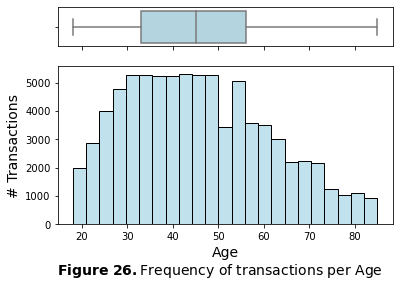

In [136]:
# Transactions per Age:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})
f.set_figsize = (24, 14)
#plt.suptitle('Frequency of transactions per age', size = 16)

sns.boxplot(data=data, x= 'age', ax=ax_box, color='lightblue')
ax_box.set_xlabel('')

sns.histplot(data=data, x='age', bins = 23, ax= ax_hist, color='lightblue')
ax_hist.set_xlabel('Age', size = 14)
ax_hist.set_ylabel('# Transactions', size = 14)

fig_label('Frequency of transactions per Age')

plt.show()

The age histogram indicates that most of the clients of Blackwell's range from mid-twenties to late 50's in age. The histogram does not indicate the presence of outliers.

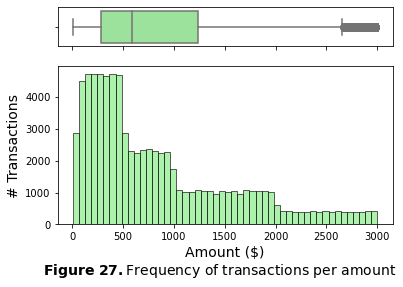

In [137]:
# Transactions per Amount:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})
f.set_figsize = (24, 14)
#plt.suptitle('Frequency of transaction per amount', size = 14)
# assigning a graph to each ax
sns.boxplot(data=data, x= 'amount', ax=ax_box, color='lightgreen')
ax_box.set_xlabel('')

sns.histplot(data=data, x='amount', bins=50, ax=ax_hist, color='lightgreen')
ax_hist.set_xlabel('Amount ($)', size = 14)
ax_hist.set_ylabel('# Transactions', size = 14)

fig_label('Frequency of transactions per amount')

plt.show()

The box plot indicates the presence of statistical **outliers**. However, we will perform more specific analysis according to where the transaction was made and the region it was made to confirm the data remains as an outlier.

The histogram further tells us that most transactions have low value when compared to the maximum value spent. This can described this more thoroughly as follows.

In [18]:
data['amount'].describe().round(2)

count    80000.00
mean       835.92
std        721.27
min          5.00
25%        285.14
50%        582.32
75%       1233.70
max       3000.00
Name: amount, dtype: float64

So that we see that the average amount spent is \\$887.25 and 75% of the transactions had value below or equal \\$1302.97.

We now proceed with a brief description of the data according to the amount of items bought.

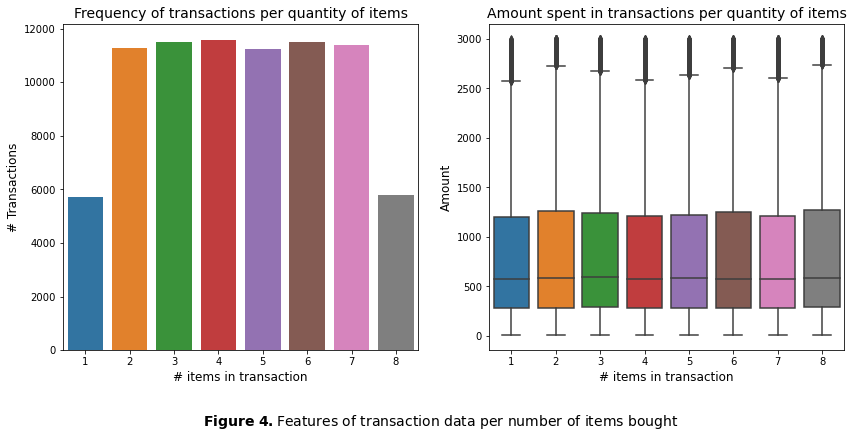

In [19]:
# Transations per number of items bought:

fig, (ax_ct, ax_box) = plt.subplots(1,2, figsize=(14,6))

sns.countplot(data=data, x='items', ax= ax_ct)
#plt.title('Frequency of transactions per quantity of items', size = 14)
ax_ct.set_xlabel('# items in transaction', size = 12)
ax_ct.set_ylabel('# Transactions', size = 12)
ax_ct.set_title('Frequency of transactions per quantity of items', size=14)

sns.boxplot(data=data, x='items', y='amount', ax= ax_box)
#plt.title('Frequency of transactions per quantity of items', size = 14)
ax_box.set_xlabel('# items in transaction', size = 12)
ax_box.set_ylabel('Amount', size = 12)
ax_box.set_title('Amount spent in transactions per quantity of items', size=14)

fig_label('Features of transaction data per number of items bought')

plt.show()

We see that the number of transactions executed is with 1 and 8 items is similar and both are smaller than the number of transactions with 2 to 7 items bought. We can also see outliers on the distribution of the amount spent per item for every quantity of items purchased. This can be due to the presence of expensive items which are sold seldomly. We will see a different pattern when we divide this data in online and in-store transactions, hence we will not remove these outliers for now.

Next, we proceed with a brief description of the data according to region.

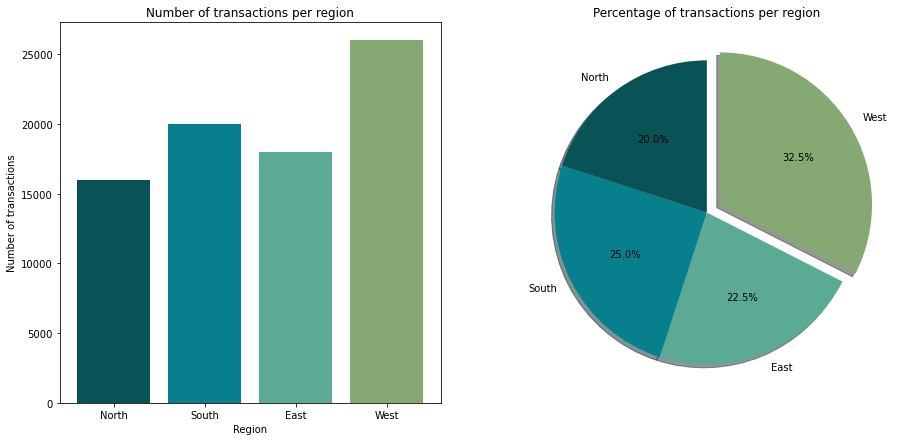

In [138]:
# Transactions per region
aux = data.groupby('region')['region'].count()

labels = ['North', 'South', 'East', 'West']
colors= ['#095256', '#087F8C', '#5AAA95', '#86A873']

plt.subplots(2,2,figsize=(15,7))

plt.subplot(1,2,1)
plt.bar(labels, aux,  color=colors)
plt.title("Number of transactions per region")
plt.xlabel('Region')
plt.ylabel('Number of transactions')

plt.subplot(1,2,2)
plt.pie(aux , labels=labels, explode=(0,0,0,0.1), autopct='%1.1f%%', shadow=True, startangle=90, colors=colors )
plt.title("Percentage of transactions per region")

plt.show()


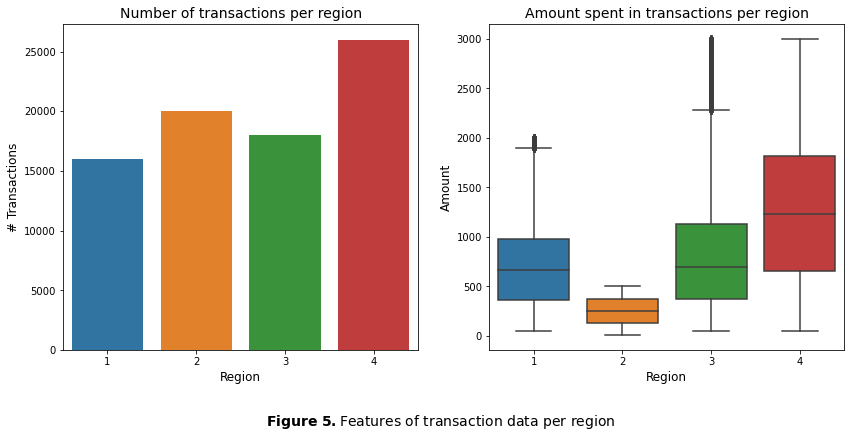

In [20]:
# Transactions per Region:

fig, (ax_ct, ax_box) = plt.subplots(1,2, figsize=(14,6))

sns.countplot(data=data, x='region', ax=ax_ct)
#plt.title('Frequency of transactions per region', size = 14)
ax_ct.set_xlabel('Region', size = 12)
ax_ct.set_ylabel('# Transactions', size = 12)
ax_ct.set_title('Number of transactions per region', size=14)

sns.boxplot(data=data, x='region', y='amount', ax=ax_box)
#plt.title('Frequency of transactions per quantity of items', size = 14)
ax_box.set_xlabel('Region', size = 12)
ax_box.set_ylabel('Amount', size = 12)
ax_box.set_title('Amount spent in transactions per region', size=14)

fig_label('Features of transaction data per region')

plt.show()

We see that Region 1 and Region 3 have the presence of outliers when looking at the amount spent. However, due the we will see in section 4 that when the due to very different behaviour of customers buying online and in-store some of these outliers will disappear when we divide the data using this feature. We will keep them for the time being.

Moreover, we see that Region 4 is the region with the greatest number of transactions and also with the highest mean and median on transactions. On the other hand, while Region 2 is not the region with less transactions, it is the region for which clients tend to spend less. We can see this as a dataframe as follows.

In [21]:
data.groupby('region')['amount'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,16000.0,745.16,493.13,50.05,359.01,662.92,973.63,1999.80
2,20000.0,252.11,142.66,5.00,129.64,250.24,374.92,499.94
3,18000.0,917.97,751.41,50.13,373.00,697.82,1134.55,3000.00
4,26000.0,1284.05,756.20,50.60,659.68,1230.50,1812.62,3000.00


As expected by what is seen on the figure above, we can order the regions from lowest to highest **mean amount spent per transaction** as

**Region 2 < Region 1 < Region 3 < Region 4.**
 
We will deepen this analysis also separating the data by online and in-store in Section 4.

### 3.4. Other features <a class="anchor" id="subsection34"></a>

By exploring the data set we have noticed that there are entries in the `amount` column with more than 2 decimal places. As there is no indication of why this might have happened, we have extracted the data with this feature into a separate data set called `excess_decimals`.

We will plot similar initial descriptions as those of the whole data below.

In [22]:
# Define a function that returns True if a string
# of a float number has more than 2 decimal places
# and False if not
f = lambda x : len(str(x).split('.')[1])>2

# Apply this function at all values in the amount column
excess_dec = data['amount'].apply(f)

In [23]:
# Extract data whose amount column has more than 2 decimals 
excess_decimals = data[excess_dec]

In [24]:
excess_decimals.head()

,in-store,age,items,amount,region
6,0,43,6,8.5472,2
12,0,32,2,58.9970,2
56,1,36,7,96.5410,1
59,0,66,1,65.6190,2
76,0,30,4,46.8620,2


In [25]:
excess_decimals.describe().round(2)

,in-store,age,items,amount,region
count,4958.00,4958.00,4958.00,4958.00,4958.00
mean,0.30,53.08,4.52,59.08,2.09
std,0.46,16.89,2.06,26.56,0.69
min,0.00,19.00,1.00,5.00,1.00
25%,0.00,39.00,3.00,38.05,2.00
50%,0.00,52.00,5.00,62.86,2.00
75%,1.00,67.00,6.00,81.43,2.00
max,1.00,85.00,8.00,100.00,4.00


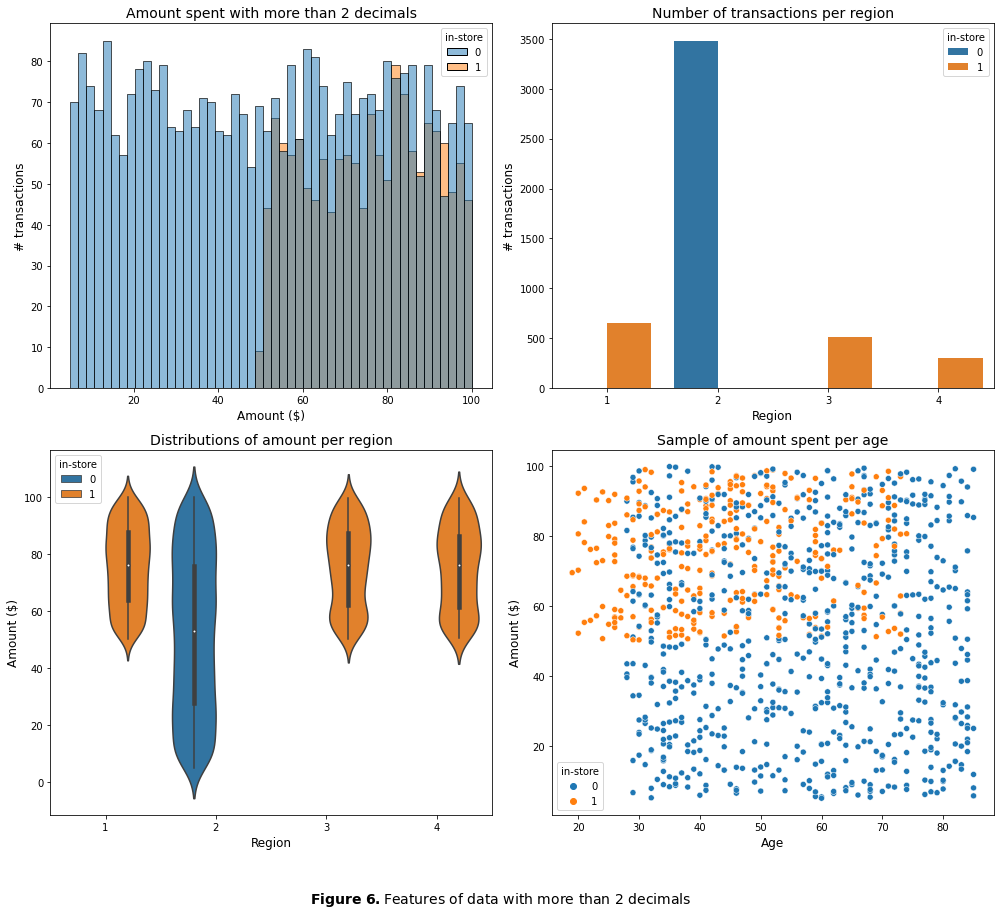

In [26]:
# Transactions with more than 2 decimals

fig, axs = plt.subplots(2,2, figsize=(14, 12))

sns.histplot(data= excess_decimals, x='amount', hue='in-store', bins=50, ax= axs[0,0])
axs[0,0].set_title('Amount spent with more than 2 decimals', size = 14)
axs[0,0].set_xlabel('Amount ($)', size = 12)
axs[0,0].set_ylabel('# transactions', size = 12)

sns.countplot(data=excess_decimals, x='region', hue='in-store', ax=axs[0,1])
axs[0,1].set_title('Number of transactions per region', size = 14)
axs[0,1].set_xlabel('Region', size = 12)
axs[0,1].set_ylabel('# transactions', size=12)

sns.violinplot(data=excess_decimals, x='region', y = 'amount', hue= 'in-store', split=False, ax=axs[1,0])
axs[1,0].set_title('Distributions of amount per region', size=14)
axs[1,0].set_xlabel('Region', size = 12)
axs[1,0].set_ylabel('Amount ($)', size = 12)


sns.scatterplot(data=excess_decimals.sample(1000), x='age', y='amount', hue='in-store', ax=axs[1,1])
axs[1,1].set_title('Sample of amount spent per age', size = 14)
axs[1,1].set_xlabel('Age', size = 12)
axs[1,1].set_ylabel('Amount ($)', size = 12)

fig_label('Features of data with more than 2 decimals')
plt.tight_layout()

There are several things to notice about the data:

- We see that the amounts with more than 2 decimals have a very different distribution to the amounts with at most two decimals. In particular, the **transactions with amounts with more than 2 decimals are all concentrated in very cheap transactions**.

- We can also see that the vast **majority of such transactions happened online in Region 2**, while these transactions only happened in-store in all other regions.

There are many possible explanations for the appearance of transaction data with more than 2 decimals:

 1. The registered amount might be in different currency;
 2. There might have been human error on registering the decimal separator;
 3. There might have been a multiplier affecting the amount of transactions with amount below 100 such as VAT; 
 4. There could have been a systematic error when processing the data.
 
Given that the data with more than 2 decimals is not that significant (6% of the total data) and that there could be many causes to raise the reliability of this data, **we will discard it for the rest of the EDA** and for modelling purposes.

We urge Blackwell's data managers to identify the source of this behaviour by focusing their attention to the online transactions happening in Region 2 and indicate if they would like this data to be explored further.

In [27]:
# Remove the data above from the original data set
data = data[~excess_dec]

## 4. Exploratory Data Analysis <a class="anchor" id="section4"></a>

In the initial exploration of the data we have seen that online and in-store transactions have very different distribution with regard to amount. We will visualize the data taking into account this difference and try to uncover other patterns and correlations.

### 4.1. Region specific EDA <a class="anchor" id="subsection41"></a>

We will start the EDA trying to uncover region specific behaviour and trends by plotting their distribution taking in consideration transactions made online and in-store.

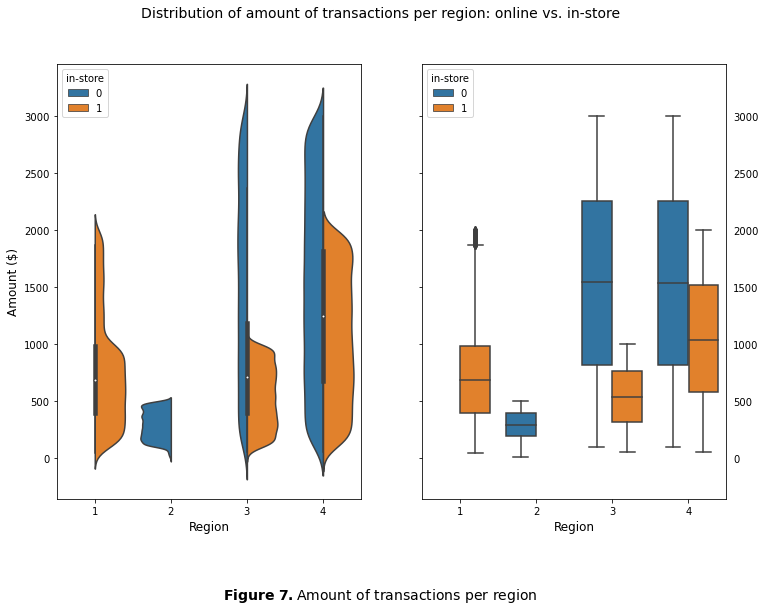

In [28]:
f, (ax_vio, ax_box) = plt.subplots(1, 2, sharey=True, gridspec_kw={"width_ratios": (.50, .50)}, figsize = (12,8))

#plt.suptitle('Frequency of transactions per region', size = 14)

sns.violinplot(data=data, x='region', y = 'amount', hue= 'in-store', split='True', ax=ax_vio)
ax_vio.set_xlabel('Region', size = 12)
ax_vio.set_ylabel('Amount ($)', size = 12)

sns.boxplot(data=data,x='region', y= 'amount', ax=ax_box, hue= 'in-store')
ax_box.set_xlabel('Region', size = 12)
ax_box.set_ylabel('')
ax_box.yaxis.set_tick_params(which='both', labelright=True)

plt.suptitle('Distribution of amount of transactions per region: online vs. in-store', size=14)
fig_label('Amount of transactions per region')

plt.show()

Before discussing the data we will give more precise numerical values to the distributions above. As follows.

In [29]:
# Information on the distribution of amount
# by region and place of transactions

data.groupby(['region', 'in-store'])['amount'].describe().round(2)

count     mean     std     min     25%      50%      75%  \
region in-store                                                               
1      1         15344.0   773.78  483.31   50.05  393.86   688.94   985.50   
2      0         16519.0   294.25  119.50    6.87  192.16   294.02   397.14   
3      0          7001.0  1541.71  835.02  100.23  814.09  1547.30  2256.40   
       1         10482.0   542.92  261.44   51.99  314.86   539.45   769.44   
4      0         12999.0  1543.74  833.58  100.27  822.12  1539.50  2256.55   
       1         12697.0  1047.14  547.20   50.60  577.46  1038.50  1522.50   

                     max  
region in-store           
1      1         1999.80  
2      0          499.94  
3      0         3000.00  
       1          999.81  
4      0         3000.00  
       1         1999.90

There are several things to notice for each region:
- Region 1 - seems to performs transactions exclusively in-store;
- Region 2 - seems to perform the **cheapest transactions exclusively online**;
- **Regions 3 and 4 have a similar distribution for in-store transactions**. Customers on these regions spend approximately the same. However, **customers in Region 4 spend more online than those in Region 3**, hence the average amount spent on Region 4 is higher than Region 3.

We will now analyse the age profile of customers per region by taking a sample of 1000 customers of each region and producing a scatterplot.

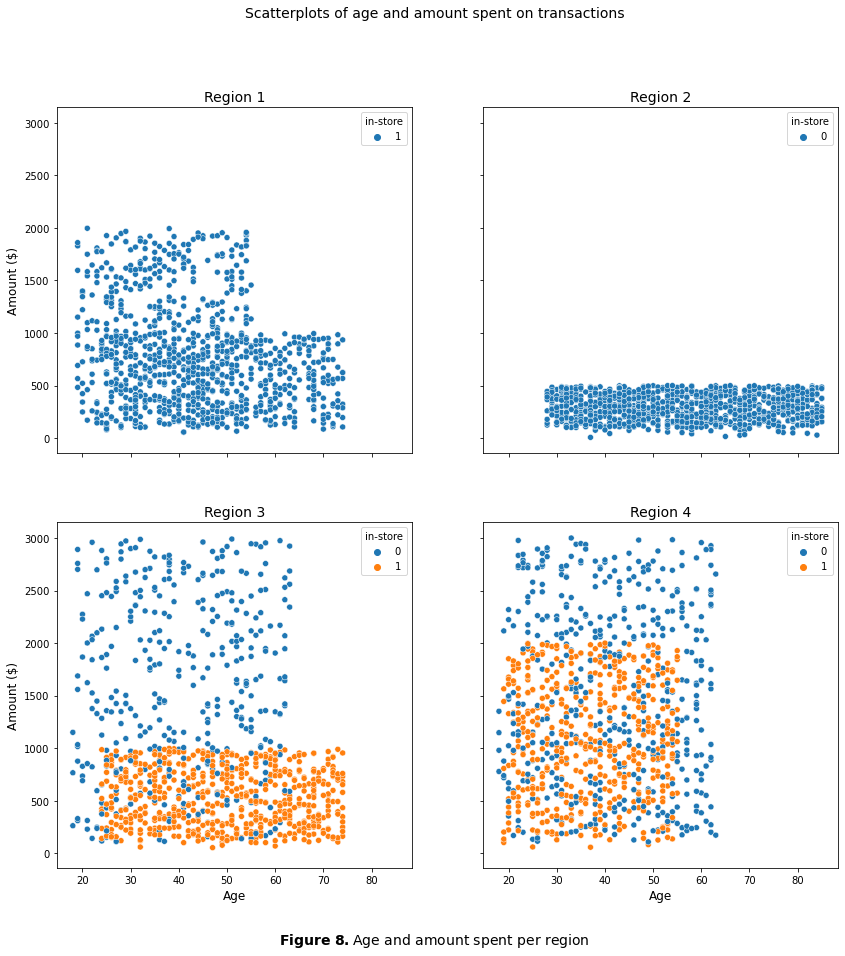

In [30]:
fig, axs = plt.subplots(2,2, figsize=(14,14), sharex=True, sharey=True)
axs = axs.ravel()

for i, ax in enumerate(axs):
    sns.scatterplot(data = data[data['region']==i+1].sample(1000), x='age', y='amount', hue='in-store', ax=ax)
    ax.set_title(f'Region {i+1}', size = 14)
    ax.set_xlabel('Age', size=12)
    ax.set_ylabel('Amount ($)', size=12)

plt.suptitle('Scatterplots of age and amount spent on transactions', size=14)    
    
fig_label('Age and amount spent per region', adj=0.1)

plt.show()

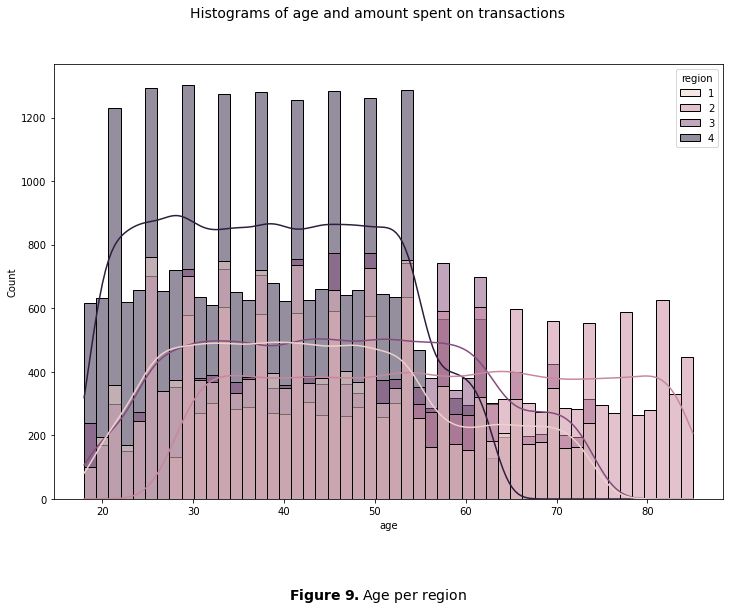

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(data = data, x='age', hue='region', kde=True, bins=50)

plt.suptitle('Histograms of age and amount spent on transactions', size=14)    
    
fig_label('Age per region')

plt.show()

We can see on Regions 3 and 4 that the age profile of the customers depend on whether the transactions are online or in-store.
While in Region 3 there is a tendency for older customers to buy in-store, on Region 4 this tendency is reversed.

The behaviour of Region 1 is puzzling. There is a sharp drop on the amount spent for the customer after 55 years old. This points out to a **possible error on the data**. Comparing with Region 3 and 4, we hypothesize that **online purchases might have been mislabeled for Region 1**, as there seem to be an overlap of two "blocks" of transactions also in Region 1, as seen in colors in Regions 3 and 4.

We can print the ranges of ages in online and in-store transactions with a script. 


In [32]:
for i in range(1, 5):
    in_store_min = data[data['region']==i][data['in-store']==1]['age'].min()
    online_min = data[data['region']==i][data['in-store']==0]['age'].min()
    in_store_max = data[data['region']==i][data['in-store']==1]['age'].max()
    online_max = data[data['region']==i][data['in-store']==0]['age'].max()
    print(f'Age ranges for Region {i} customers: Online = [{online_min},{online_max}], In-store=[{in_store_min},{in_store_max}]')

Age ranges for Region 1 customers: Online = [nan,nan], In-store=[19,74]
Age ranges for Region 2 customers: Online = [28,85], In-store=[nan,nan]
Age ranges for Region 3 customers: Online = [18,63], In-store=[24,74]
Age ranges for Region 4 customers: Online = [18,63], In-store=[19,55]


We summarize the age ranges for each type of transaction in the following table:

|Types of transactions | Exclusively in-store | Exclusively online | Both online and in-store |
|:---:|:--:|:--:|:--:|
|Region 1| 19 to 74 | N/A | N/A |
|Region 2| N/A | 28 to 85 | N/A |
|Region 3|64 to 74| 18 to 23| 24 to 63|
|Region 4| N/A | 18 to 18 and 56 to 63| 19 to 55 | 

Other than the strange behaviour of Region 1, **age does not seem to be correlated to the amount of spent per transactions**. As the correlation seems to be more about wether the transactions were made in-store or online.

### 4.2. EDA on number of items purchased per transaction <a class="anchor" id="subsection42"></a>

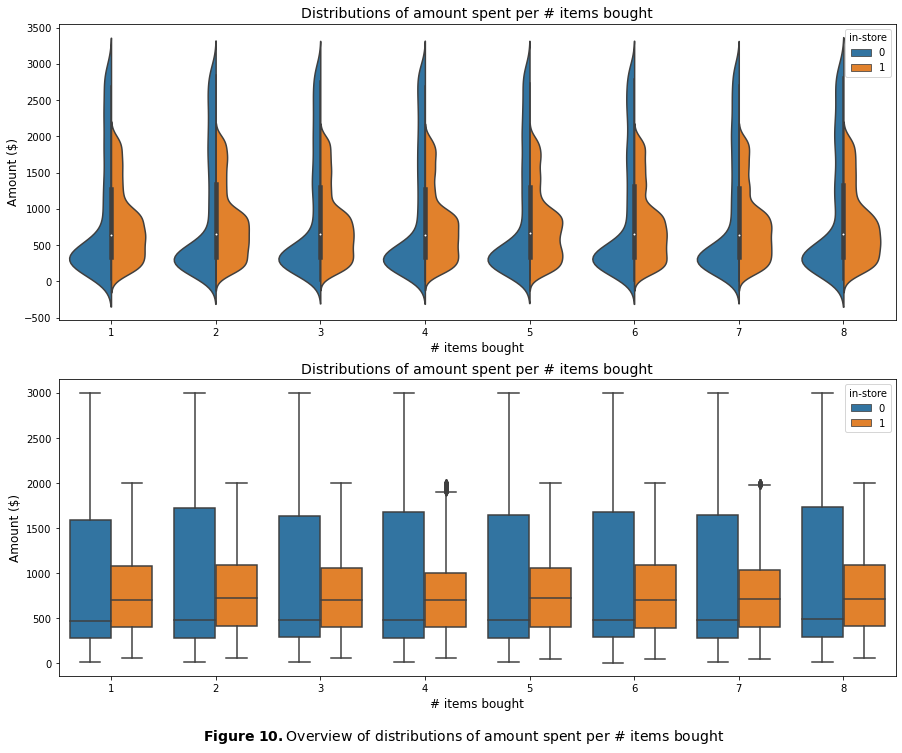

In [33]:
fig, (ax_vio, ax_box) = plt.subplots(2,1, figsize=(15,12))


sns.violinplot(data=data, x='items', y = 'amount', hue= 'in-store', split='True', ax=ax_vio)
ax_vio.set_xlabel('# items bought', size = 12)
ax_vio.set_ylabel('Amount ($)', size = 12)
ax_vio.set_title('Distributions of amount spent per # items bought', size=14)

sns.boxplot(data=data, x='items', y = 'amount', hue= 'in-store', ax=ax_box)
ax_box.set_xlabel('# items bought', size = 12)
ax_box.set_ylabel('Amount ($)', size = 12)
ax_box.set_title('Distributions of amount spent per # items bought', size=14)

fig_label('Overview of distributions of amount spent per # items bought', adj =0.1)

We see that the distributions of amount spent by quantity of items bought seem to be very similar. This is a strong indicator that **the quantity of items bought and amount spent in a transaction are not correlated**.

Althought some plots seem to have outliers, the amount of these outliers seem to be still within a reasonable frame of all online purchases, therefore we will not remove them to calculate our correlation coefficients.

We will also produce histograms to visualize the relation between age and quantity of items bought.

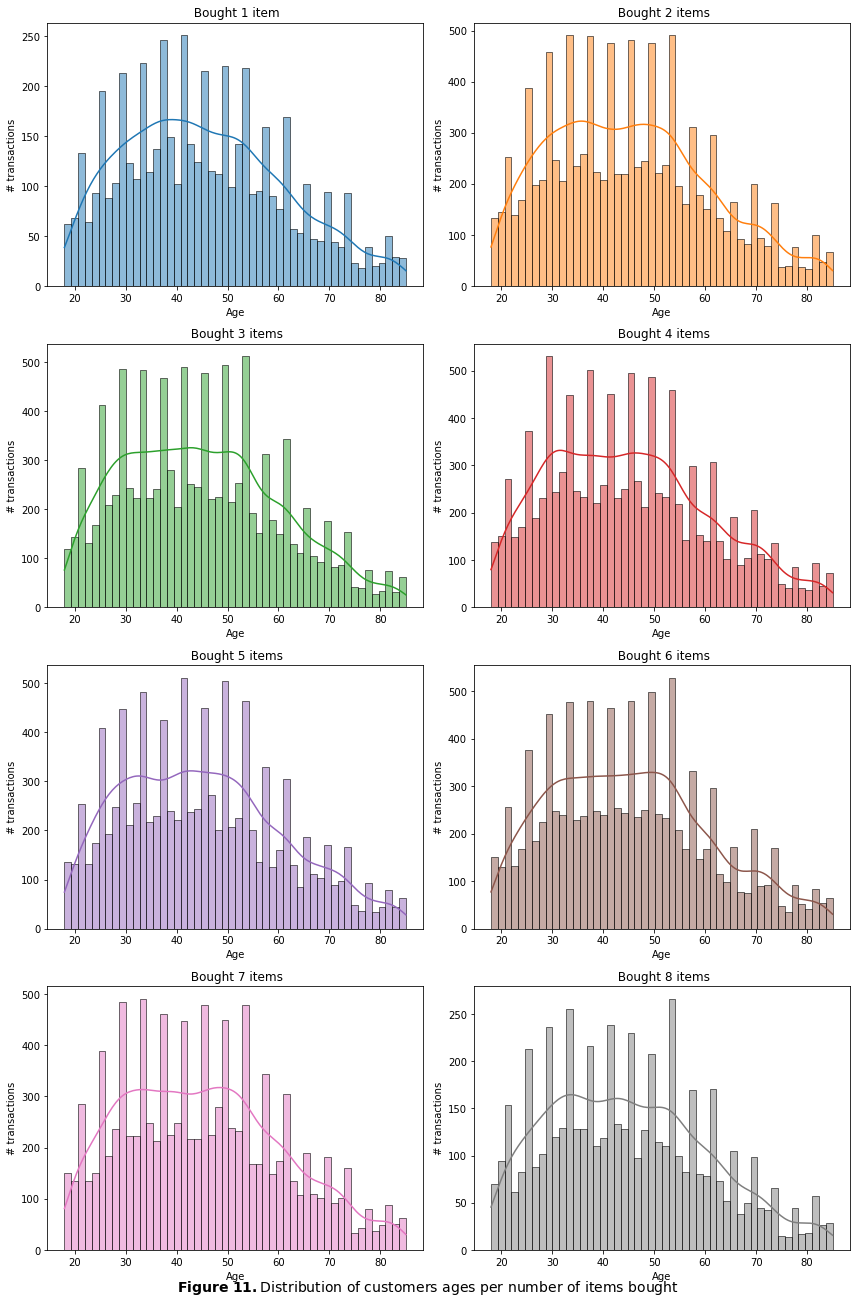

In [34]:
fig, axs = plt.subplots(4,2, squeeze=False, figsize = (12,18))
colors = cm.tab10(np.linspace(0, 1, 10))
for i in range(8):
    sns.histplot(ax=axs[i//2, i%2], data=data[data['items']==i+1], x='age', color=colors[i], bins=50, kde= True)
    axs[i//2, i%2].set_xlabel('Age')
    axs[i//2, i%2].set_ylabel('# transactions')
    title = f' Bought {i+1} item'
    if i>0:
        title = title + 's'
    axs[i//2,i%2].set_title(title)
    
#plt.suptitle('Distribution of customers ages per number of items bought', size = 14)

fig_label('Distribution of customers ages per number of items bought', adj=0.05)
plt.tight_layout()

As seen by the plots above, for each quantity of item bought the distribution of transactions with respect to age are very similar. We hypothesize that **age and quantity of items bought per transaction have weak correlation**. We will compute coefficients supporting this claim in the next section.

### 4.3 Correlation coefficients supporting hypotheses <a class="anchor" id="subsection43"></a>

Since both the variables `in-store` and `region` are categorical there is little we can do to compute correlation coefficients. Instead, we have conducted a qualitative analysis of correlation on Section 4.1. We can, however, compute correlation coefficients between `amount`, `age` and `items`.

We have seen graphically that most relationships between these three variables do not seem to be linear, so that the Pearson correlation coefficient might not give us information to compare our variables in a reasonable manner. We also note that due to the high number of "repeated entries" in the columns `age` (ranging from 18 to 85) and `items` (which only range from 1 to 8) the ranks determined by the Spearman coefficient might also not give us an adequate metric to compare correlations.

Finally, the Kendall-tau coefficient circumvents both of the problems mentioned with these two other coefficients. Therefore, we choose this coefficient as a way to measure and compare the correlation between the remaining three variables.

We have not identified atypical transactions (other than the ones with more than 2 decimals in amount) to be regarded as outliers. Therefore we won't remove data to compute these coefficients.

However we have **identified possible mislabelings** on online and in-store transactions on Region 1. This will show on the coefficients calculated.

We will produce the following correlation matrices: a matrix using the whole data without segmenting, matrices using the segmentation of region, one using the segmentation of online sales.

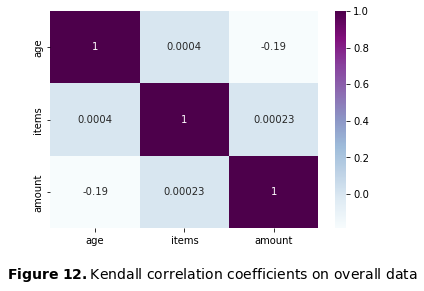

In [35]:
corr_mat = data[['age', 'items', 'amount']].corr('kendall')
sns.heatmap(corr_mat, annot=True, cmap='BuPu')
fig_label('Kendall correlation coefficients on overall data')
plt.show()

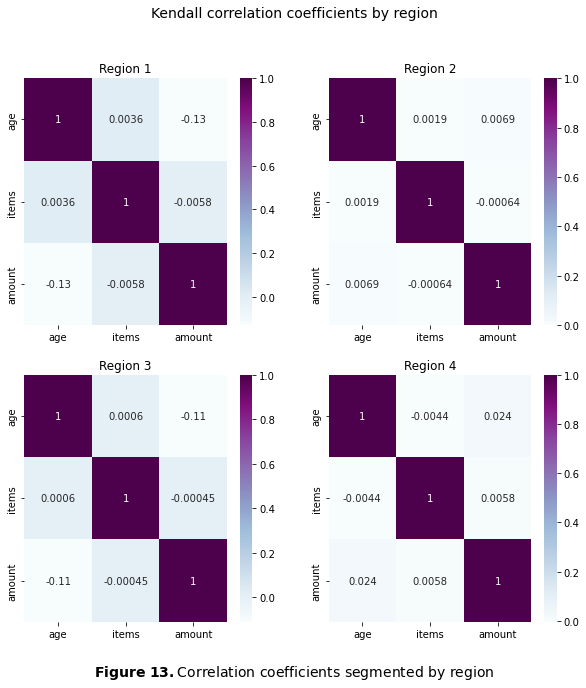

In [36]:
f, axs = plt.subplots(2,2, figsize=(10,10))
axs = axs.ravel()

for i, ax in enumerate(axs):
    corr_mat = data[data['region']==i+1][['age', 'items', 'amount']].corr('kendall')
    sns.heatmap(corr_mat, annot=True, cmap='BuPu', ax=ax)
    ax.set_title(f'Region {i+1}', size = 12)
    
plt.suptitle('Kendall correlation coefficients by region', size = 14)
fig_label('Correlation coefficients segmented by region', adj=0.1)
plt.show()

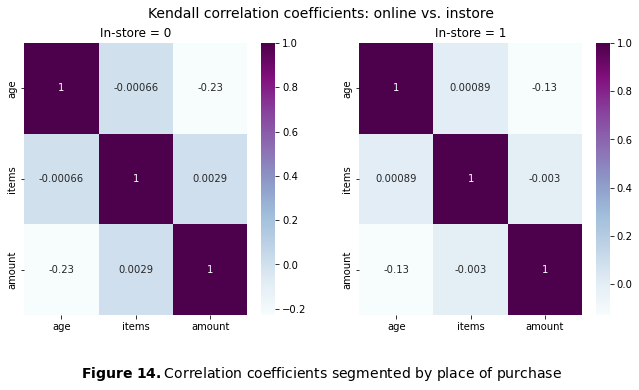

In [37]:
f, axs = plt.subplots(1,2, figsize=(11,5))
axs = axs.ravel()

for i, ax in enumerate(axs):
    corr_mat = data[data['in-store']==i][['age', 'items', 'amount']].corr('kendall')
    sns.heatmap(corr_mat, annot=True, cmap='BuPu', ax=ax)
    ax.set_title(f'In-store = {i}', size = 12)
    
plt.suptitle('Kendall correlation coefficients: online vs. instore', size = 14)
fig_label('Correlation coefficients segmented by place of purchase')
plt.show()

We see that regardless of segmentation the variables `amount`, `age` and `items` have Kendall-tau coefficient very close to zero, implying that **these variables are weakly correlated**. Notice that amount and age have slightly higher correlation coefficient than the other variable combinations. Figure 8 indicates that this might be due to the different behaviour of age groups when buying online or in-store.

## 5. In-Depth Analysis with ML models <a class="anchor" id="section5"></a>

### 5.1. `region` as dependent variable <a class="anchor" id="subsection51"></a>

We will use `region` as a dependent variable to investigate correlation with other variables. In particular with the `age` variable.

In what follows we use a Grid Search to decide the best Decision Tree Classifier to predict `region` only using `age` as a dependent variable. In the Grid Search we will try to optimize accuracy since, a priori, there is no reason to prioritize precision or recall for any especific region.

In [38]:
X = data['age'].values.reshape(-1, 1)
y = data['region']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1)
dtc = DecisionTreeClassifier()
parameters = {'max_depth':[None, 3,4,5,6],
  'min_impurity_decrease' : [0, 0.001, 0.002, 0.003],
  'min_samples_split': [2, 500, 1000],
  'min_samples_leaf': [1, 500, 1000],
  'class_weight':[None, 'balanced']  
 }

GS = GridSearchCV(dtc, parameters)
GS.fit(X_train,y_train)
model = GS.best_estimator_
cv_score = GS.best_score_
score = model.score(X_test,y_test)
print(f"""The best accuracy of cross validation on tree classifier is {100*cv_score:.2f}%.
The accuracy using the test set is {100*score:.2f}%.
The model is {model}""")

The best accuracy of cross validation on tree classifier is 43.64%.
The accuracy using the test set is 43.14%.
The model is DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0)


The accuracies of the model from cross validation and from the testing sets are similar, indicating the model is not overfitting the training data. The result indicates that `age` has some predictive power on region since the overall accuracy over the test set is 43.14% which is better than the accuracy of a random guess (25%). However, we will understand more details of the model by plotting the following confusion matrix. 

<Figure size 576x576 with 0 Axes>

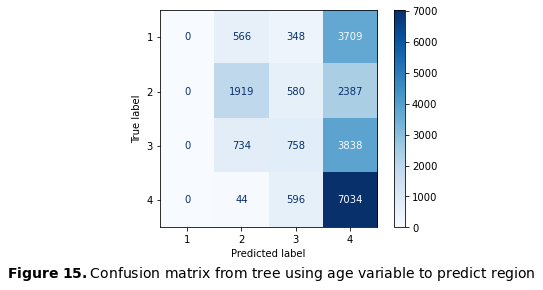

In [39]:
fig = plt.figure(figsize=(8,8))
plot_confusion_matrix(model, X_test,y_test, cmap='Blues')

fig_label('Confusion matrix from tree using age variable to predict region')
plt.show()

We see that **the model cannot identify any transactions on Region 1** and has a tendency on classifying that most transactions ocurred on Region 4. This is already hinted on Figure 9, where we can see that the age distributions of Region 4 overlap and dominate the distributions of other regions.

In what follows we will compare `age` with other variables by selecting the best decision tree model to predict `region` using all variables and measuring its importance an plotting the resulting tree.

In [40]:
X = data[['age', 'amount', 'items', 'in-store']]
y = data['region']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1)
dtc = DecisionTreeClassifier()
parameters = {'max_depth':[None, 3,4,5,6],
  'min_impurity_decrease' : [0, 0.001, 0.002, 0.003],
  'min_samples_split': [2, 500, 1000],
  'min_samples_leaf': [1, 500, 1000]
 }
GS = GridSearchCV(dtc, parameters, cv=7)
GS.fit(X_train,y_train)
model = GS.best_estimator_
cv_score = GS.best_score_
score = model.score(X_test,y_test)
print(f"""The cross validation accuracy of the best tree classifier is {100*cv_score:.2f}%.
The accuracy using the test set is {100*score:.2f}%.
The model is {model}""")

The cross validation accuracy of the best tree classifier is 63.45%.
The accuracy using the test set is 62.72%.
The model is DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0,
                       min_samples_split=500)


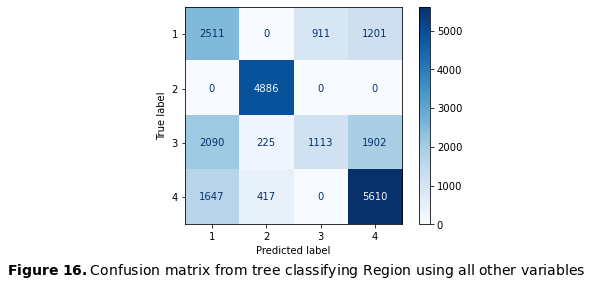

In [41]:
plot_confusion_matrix(model, X_test,y_test, cmap= 'Blues')
fig_label('Confusion matrix from tree classifying Region using all other variables')
plt.show()

In [42]:
# Collect feature importances in a data frame.

importances = pd.DataFrame(data={
    'feature': X_train.columns,
    'importance': model.feature_importances_})
display(importances)

,feature,importance
0,age,0.086555
1,amount,0.439076
2,items,0.000332
3,in-store,0.474038


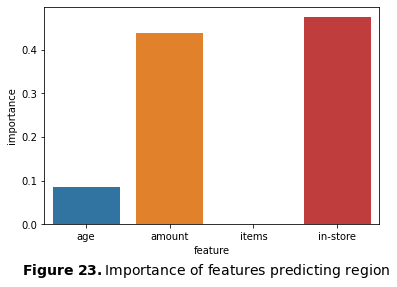

In [59]:
# Plot feature importances on a bar chart.

fig = sns.barplot(data=importances, x='feature', y = 'importance')
fig_label('Importance of features predicting region')

From figure we see that `age` **has much less importance** than `amount` and `in-store` variables when trying to classify the region where a purchase has occurred. We can see there are very few splits depending on the age variable by explicitly visualizing the tree as follows.

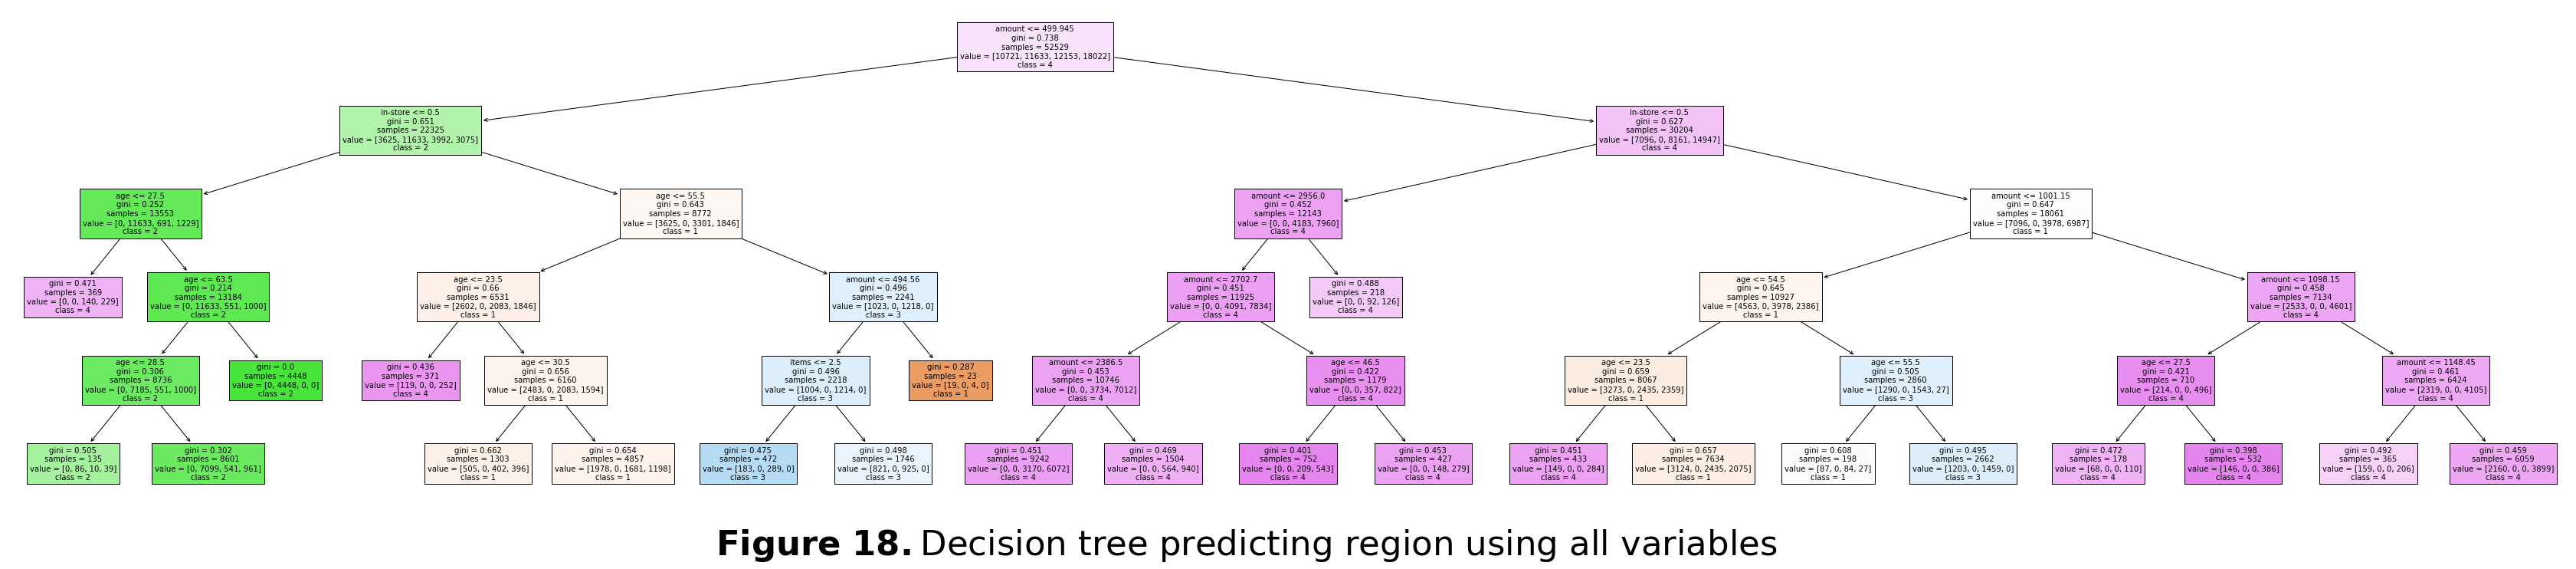

In [44]:
fig = plt.figure(figsize=(60,12))
tree = plot_tree(model, feature_names=X_train.columns,class_names=['1', '2', '3', '4'], filled=True, fontsize =10)

fig_label('Decision tree predicting region using all variables', adj=0.1, size =45)
plt.show()

### 5.2. `age` as dependent variable <a class="anchor" id="subsection52"></a>

We have seen in the EDA that there is a possible relation between different age groups according to regions, see Figures 8 and 9.

In what follows we will discretize the `age` variable and use decision tree classifiers to try to predict age from the other variables `items`, `amount` and `in-store` on each region.

We will use a predictive model using 3 bins of the variable `age` that divide the age span of the customers in a natural way and  simultaneously bring business value from the patterns we see in the age distributions of Figure 9.

We will explore two approaches for this:
 1. Approach to try to predict a natural partition on age;
 2. Approach to try to define a partition with the aim of improving precision.

For the first approach we use a reasonable partition of age in the following bins:

|label| age|
|:----:|:---:|
|Young| 18 to 29|
|Middle-aged| 30 to 64|
|Elderly| 65 to 85|

We will use a Grid Search algorithm that tries to maximize the F1-score of our predicted labels. This is done to avoid choosing a model that simply predicts one class to obtain higher accuracy.

In [45]:
# Creates dictionary of best models for each region
best_models = {}

# Create age bins
data['age_bins'] = pd.cut(data['age'], bins =[17, 29, 64, 85], labels=['Young', 'Middle-aged', 'Elderly'])

for i in range(4):
    # Group data of one region
    region_data = data[data['region']==i+1]
    region_bins = region_data['age_bins']
    
    # Define independent variables for Decision tree
    X= region_data[['items', 'in-store', 'amount']]

    # Separate X and y in training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, region_bins, test_size=.3, random_state=1)
    
    # Define decision tree classifier and
    # parameters to perform a Grid Search
    tree = DecisionTreeClassifier()
    parameters = {'max_depth':[None, 3,4,5],
                  'min_impurity_decrease' : [0, 0.0025, 0.005, 0.0075],
                  'min_samples_split': [2, 400, 500],
                  'min_samples_leaf': [1, 400, 500],
                  'class_weight': [None, 'balanced']
                 }
    
    # Use Grid Search algorithm to find best parameters for modelling
    GS = GridSearchCV(tree, parameters, scoring="f1_macro")
    GS.fit(X_train,y_train)
    model = GS.best_estimator_
    cv_score= GS.best_score_
    score = f1_score(y_test, model.predict(X_test), average='macro')
    
    # Add model to the dictionary
    best_models[f'Region {i+1}'] = {'model':model,
                                    'X_test': X_test,
                                    'y_test': y_test,
                                   'score': score}
    
    print(f'------------ Report for Region {i+1} -------------\n')        
    print(f"""The cross validation F1-score of the best tree classifier is {cv_score:.2f}%.
The F1-score using the test set is {score:.2f}%.
The model is {model}\n""")
    print(classification_report(y_test, model.predict(X_test)))

------------ Report for Region 1 -------------

The cross validation F1-score of the best tree classifier is 0.35%.
The F1-score using the test set is 0.34%.
The model is DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0)

              precision    recall  f1-score   support

     Elderly       0.13      0.14      0.14       461
 Middle-aged       0.71      0.69      0.70      3310
       Young       0.18      0.20      0.19       833

    accuracy                           0.55      4604
   macro avg       0.34      0.34      0.34      4604
weighted avg       0.56      0.55      0.55      4604

------------ Report for Region 2 -------------

The cross validation F1-score of the best tree classifier is 0.33%.
The F1-score using the test set is 0.33%.
The model is DecisionTreeClassifier(min_impurity_decrease=0)

              precision    recall  f1-score   support

     Elderly       0.37      0.37      0.37      1803
 Middle-aged       0.61      0.60      0.61  

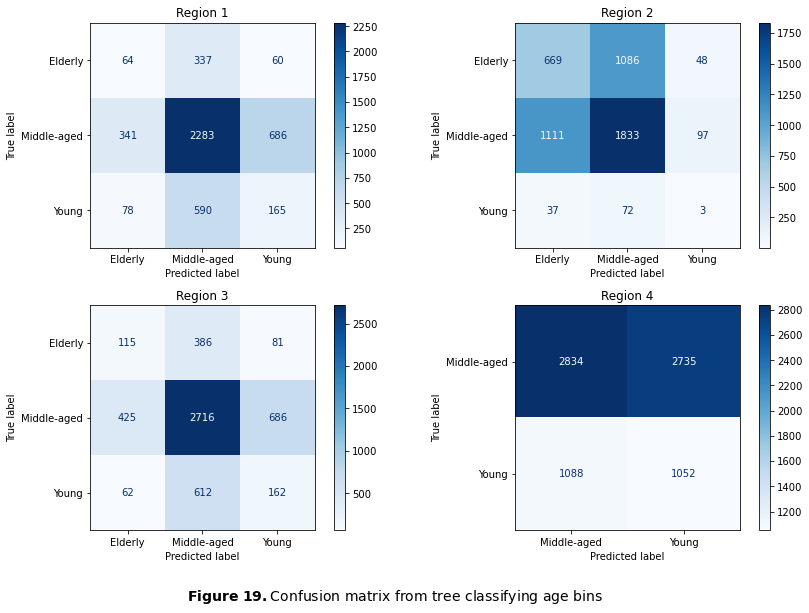

In [46]:
# Plot confusion matrices of the models defined above

fig, axs = plt.subplots(2,2,figsize=(12,8))
axs = axs.ravel()

for i, ax in enumerate(axs):
    
    # Recover best model and test sets
    model = best_models[f'Region {i+1}']['model']
    X_test = best_models[f'Region {i+1}']['X_test']
    y_test = best_models[f'Region {i+1}']['y_test']

    plot_confusion_matrix(model, X_test,y_test, cmap= 'Blues', ax = ax)
    ax.set_title(f'Region {i+1}', size = 12)
    
fig_label('Confusion matrix from tree classifying age bins')
plt.tight_layout()

We see that when trying to predict customer age with the selected bins we have limited predictive power for young and elderly customers in every region. We have **high precision for Middle-aged customers since most of Blackwell's clients fall in this category**. However, **the models are much less precise for young and elderly customers**.

For the second approach, we would like to increase the precision of our models. We will construct a model using quantile bins. This also provides business insight as it divides customer data in exact proportions.  We will perform another Grid Search on models using the 3 quantiles of the variable `age`. As before we will try to maximize the F1-score to avoid obtaining models that simply predict one label.

In [47]:
# Divide the age data in terciles

kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
data['quantile_age_group'] = kbins.fit_transform(data['age'].values.reshape(-1,1))
edges = kbins.bin_edges_
edges

array([array([18., 37., 52., 85.])], dtype=object)

So that we have the following labels

|label| age|
|:----:|:---:|
|1st tercile| 18 to 36|
|2nd tercile| 37 to 51|
|3rd tercile| 52 to 85|

In [48]:
# Models and classification reports for each region

for i in range(4):
    # Group data of one region
    region_data = data[data['region']==i+1]
    region_bins = region_data['quantile_age_group']
    
    # Define independent variables for Decision tree
    X= region_data[['items', 'in-store', 'amount']]

    # Separate X and y in training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, region_bins, test_size=.3, random_state=1)
    # Define decision tree classifier and
    # parameters to perform a Grid Search
    tree = DecisionTreeClassifier()
    parameters = {'max_depth':[None, 3,4,5],
                  'min_impurity_decrease' : [0, 0.0025, 0.005, 0.0075],
                  'min_samples_split': [2, 400, 500],
                  'min_samples_leaf': [1, 400, 500],
                  'class_weight': [None, 'balanced']
                 }

    # Use Grid Search algorithm to find best parameters for modelling
    GS = GridSearchCV(tree, parameters, scoring ='f1_macro')
    GS.fit(X_train,y_train)
    model = GS.best_estimator_
    cv_score= GS.best_score_
    score = f1_score(y_test, model.predict(X_test),average='macro')
    
    # Add model to the dictionary
    best_models[f'Region {i+1}'] = {'model':model,
                                    'X_test': X_test,
                                    'y_test': y_test}

    
    print(f'---------- Report for Region {i+1} -----------\n')        
    print(f"""The cross validation F1-score of the best tree classifier is {cv_score:.2f}.
The F1-score using the test set is {score:.2f}.
The model is {model}\n""")
    print(classification_report(y_test, model.predict(X_test),
                                target_names=['1st tercile', '2nd tercile', '3rd tercile']))

---------- Report for Region 1 -----------

The cross validation F1-score of the best tree classifier is 0.37.
The F1-score using the test set is 0.37.
The model is DecisionTreeClassifier(min_impurity_decrease=0, min_samples_split=400)

              precision    recall  f1-score   support

 1st tercile       0.42      0.36      0.39      1665
 2nd tercile       0.34      0.29      0.32      1623
 3rd tercile       0.34      0.47      0.40      1316

    accuracy                           0.37      4604
   macro avg       0.37      0.37      0.37      4604
weighted avg       0.37      0.37      0.36      4604

---------- Report for Region 2 -----------

The cross validation F1-score of the best tree classifier is 0.32.
The F1-score using the test set is 0.33.
The model is DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0)

              precision    recall  f1-score   support

 1st tercile       0.13      0.14      0.14       679
 2nd tercile       0.26      0.27 

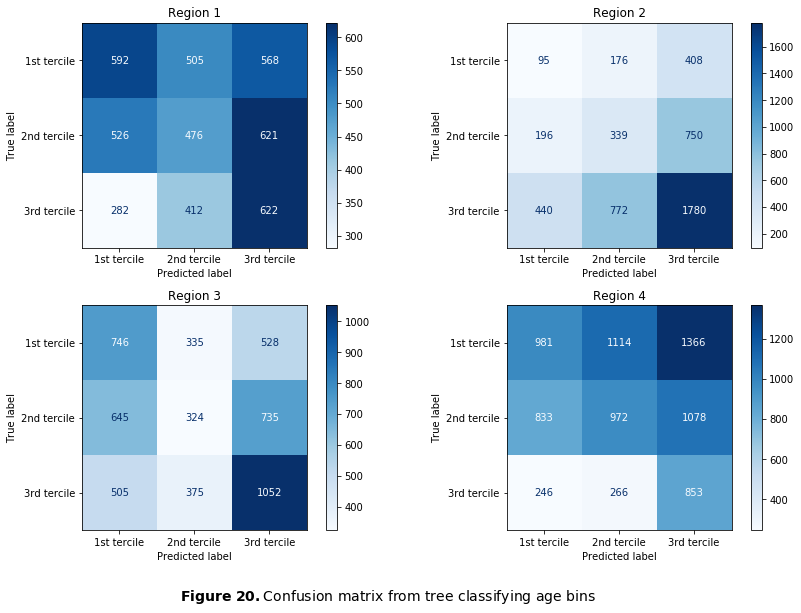

In [45]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
axs = axs.ravel()

for i, ax in enumerate(axs):
    # Recover best model and test sets
    # from uniform strategy
    model = best_models[f'Region {i+1}']['model']
    X_test = best_models[f'Region {i+1}']['X_test']
    y_test = best_models[f'Region {i+1}']['y_test']

    plot_confusion_matrix(model, X_test,y_test, cmap= 'Blues', display_labels=['1st tercile', '2nd tercile', '3rd tercile'], ax = ax)
    ax.set_title(f'Region {i+1}', size = 12)
fig_label('Confusion matrix from tree classifying age bins')
plt.tight_layout()

We see that, **although the models using terciles have lower accuracy, they are more precise in predicting age groups of Blackwell's customers.**

### 5.3. `in-store` as dependent variable <a class="anchor" id="subsection53"></a>

In this section we construct two decision tree models using the `in-store`variable as dependent variable:

1. Using only age as an independent variable to understand its predictve power on the variable.

2. Using all other variables (including age) with the exception of the `in-store` variable as independent variables and compare their importances to this model. 

We will use a Decision Tree classifier and perform a Grid Search limiting the max depth up to 7 to avoid overfitting and trying to maximize accuracy. We will then compare the feature importances of the best model.

In [46]:
# Model using age as predictor

X = data[['age']]
y = data['in-store']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1)

dtc = DecisionTreeClassifier()
parameters = {'max_depth':[5, 6, 7],
              'min_impurity_decrease' : [0, 0.0025, 0.005, 0.0075],
              'min_samples_split': [2, 250, 500, 750],
              'min_samples_leaf': [200, 400, 500, 600]
             }

# Use Grid Search algorithm to find best parameters for modelling
GS = GridSearchCV(dtc, parameters)
GS.fit(X_train,y_train)

model = GS.best_estimator_
cv_score = GS.best_score_
score = model.score(X_test, y_test)

print(f"""The cross validation accuracy of the best tree classifier is {100*cv_score:.2f}%.
The accuracy using the test set is {100*score:.2f}%.
The model is {model}""")

The cross validation accuracy of the best tree classifier is 59.59%.
The accuracy using the test set is 60.13%.
The model is DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0,
                       min_samples_leaf=200)


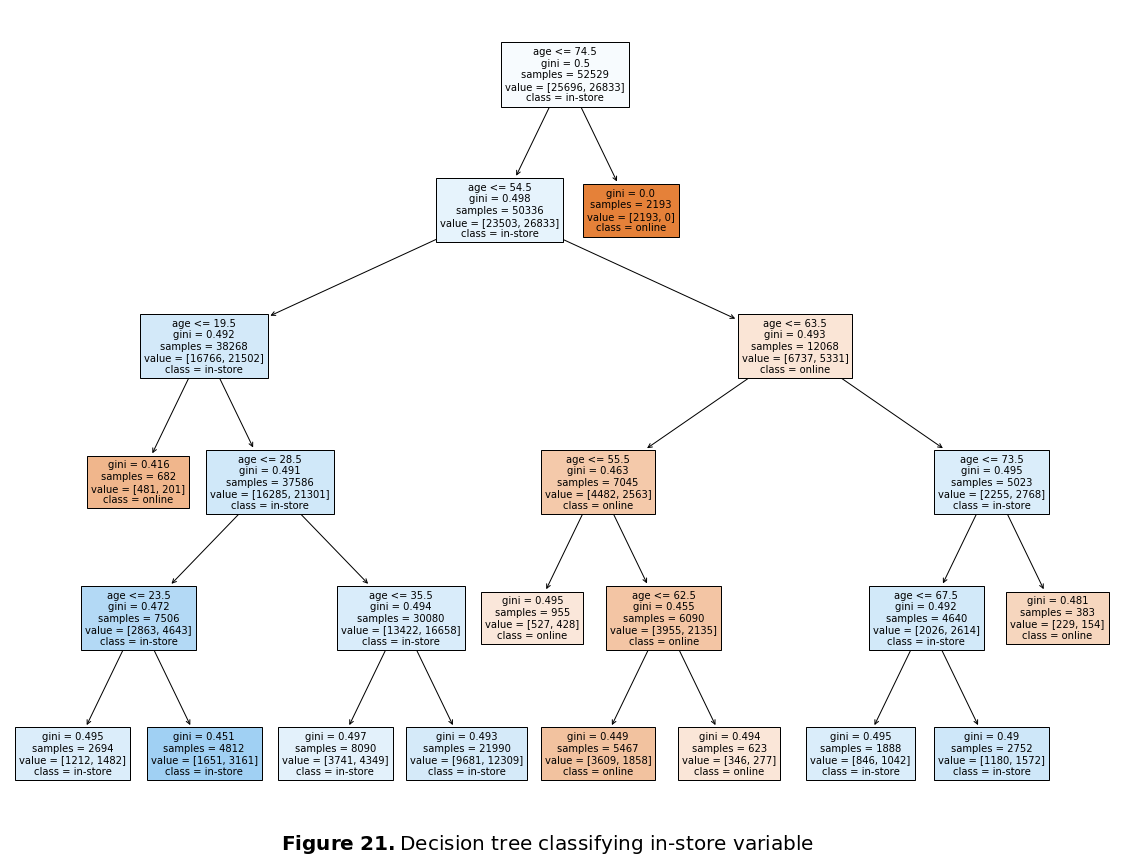

In [47]:
fig = plt.figure(figsize=(20,15))
tree = plot_tree(model, feature_names=X_train.columns,class_names=['online', 'in-store'], filled=True, fontsize =10)
fig_label('Decision tree classifying in-store variable', adj = 0.15 , size=20)
plt.show()

It is worth noticing that there is only one leaf on the tree above that has gini purity below 0.450 and is the leaf that corresponds to customers which are over 74 years of age. **All customers over 75 years of age made transactions online**.

Although accuracy has been better than a guess, model struggles to have leaves with higher purity only using ``age`` as a predictor. Which **supports the hypothesis that customers below 75 do not have a clear pattern of buying online or in-store**.

To see this even further let us compare the importance of age when compared to other variables predicting `in-store`.

In [48]:
# Model using all variables as predictors

X = data[['age', 'region', 'amount', 'items']]
y = data['in-store']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1)

dtc = DecisionTreeClassifier()
parameters = {'max_depth':[5, 6, 7],
              'min_impurity_decrease' : [0, 0.0025, 0.005, 0.0075],
              'min_samples_split': [2, 250, 500, 750],
              'min_samples_leaf': [200, 400, 500, 600]
             }

# Use Grid Search algorithm to find best parameters for modelling
GS = GridSearchCV(dtc, parameters)
GS.fit(X_train,y_train)

model = GS.best_estimator_
cv_score = GS.best_score_
score = model.score(X_test, y_test)

print(f"""The cross validation accuracy of the best tree classifier is {100*cv_score:.2f}%.
The accuracy using the test set is {100*score:.2f}%.
The model is {model}""")

The cross validation accuracy of the best tree classifier is 87.74%.
The accuracy using the test set is 87.82%.
The model is DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0,
                       min_samples_leaf=200)


We now compute and visualize the importance of each feature on the most accurate model.

In [49]:
importances = pd.DataFrame(data={
    'feature': X_train.columns,
    'importance': model.feature_importances_})
display(importances)

,feature,importance
0,age,0.060853
1,region,0.716639
2,amount,0.222508
3,items,0.000000


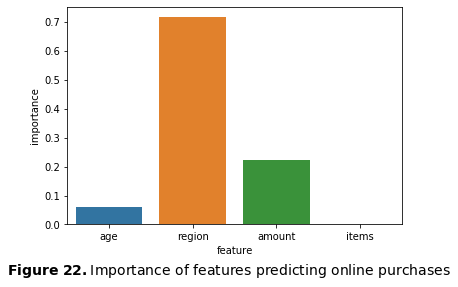

In [50]:
fig = sns.barplot(data=importances, x='feature', y = 'importance')
fig_label('Importance of features predicting online purchases')

We see that `age` **is responsible for only 6.08% of the information gain in the most accurate model** while `region` and `amount` are responsible for much more (71.66% and 22.25% respectively) and the feature `items` **does not contribute to any significant information gain** (with 0%).

**This reinforces the idea that the variable `in-store` is more related to `amount` and `region` than to `age` and is independent of `items`.**

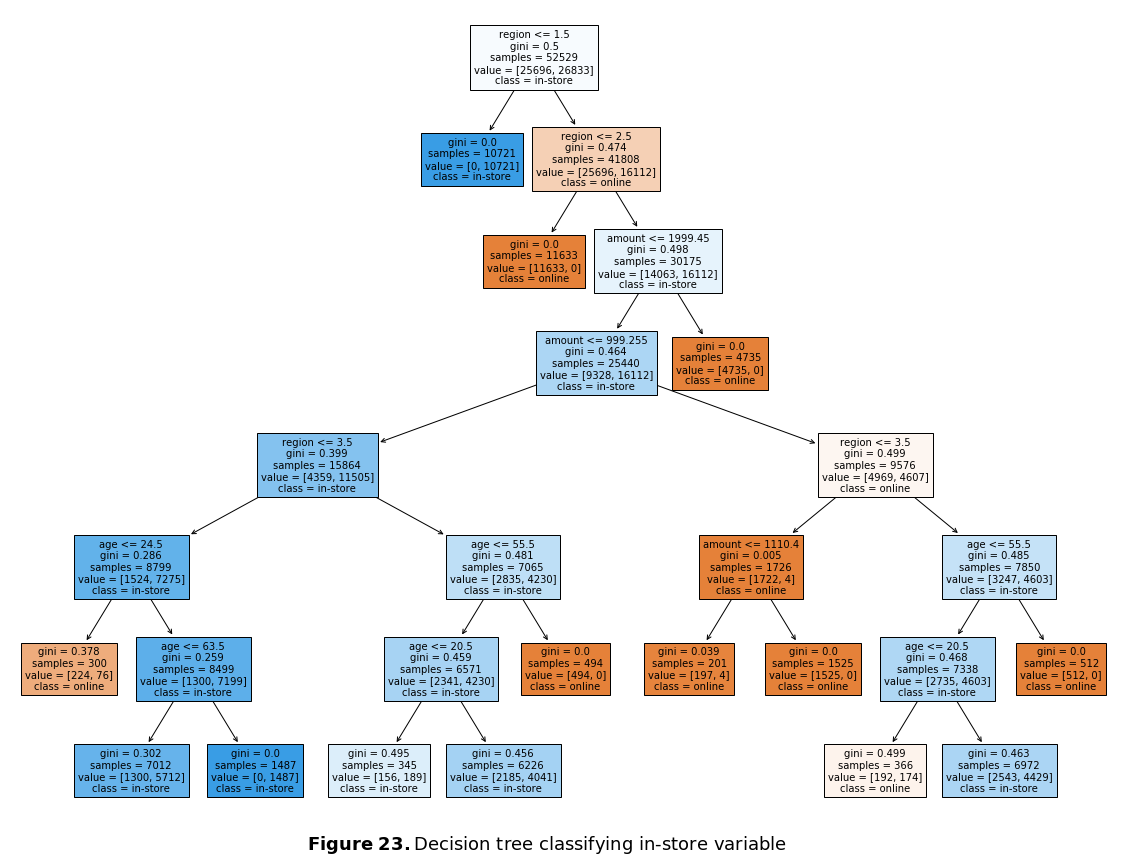

In [51]:
fig = plt.figure(figsize=(20,15))
tree = plot_tree(model, feature_names=X_train.columns,class_names=['online', 'in-store'], filled=True, fontsize =10)
fig_label('Decision tree classifying in-store variable', adj=0.15, size=18)
plt.show()

### 5.4. `amount` as dependent variable <a class="anchor" id="subsection54"></a>

We proceed in a similar fashion than with the `age` variable. That is, we use decision tree classifiers to try to predict amount from the other variables `items`, `amount` and `in-store` on each region.

In Figure 3 we have seen the overall distribution of the `amount` variable, with that we can see sharp drops on the frequency of transactions above \\$500, above \\$1000 and above \\$2000, therefore we will use a decision tree trying to used a binned `amount` variable using the following bins:

|label| age|
|:----:|:---:|
|Cheap| \\$6 to \\$500|
|Low-Middle range| \\$501 to $1000|
|High-Middle range| \\$1001 to \\$2000| 
|Expensive| \\$2001 to \\$3000|

We will use a Grid Search trying to maximize precision of the predicted bins. We have chosen precision since this metric would allow Blackwell's to maximize their trust on a predicted label (we are aiming to maximize the amount of customers receiving a given label *correctly* among customers that the same label), which in turn would allow them to better taylor their marketing strategies to customers within a predicted expenditure range.

In [52]:
# Model for amount variable

# Create age bins
data['amount_bins'] = pd.cut(data['amount'],
                             bins =[6, 500, 1000, 2000, 3000],
                             labels=['Cheap', 'Lower Middle range', 'Upper Middle range', 'Expensive'])

# Define independent variables for Decision tree
X= data[['region', 'items', 'in-store', 'age']]

# Separate X and y in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['amount_bins'], test_size=.3, random_state=1)

# Define decision tree classifier and
# parameters to perform a Grid Search
tree = DecisionTreeClassifier()
parameters = {'max_depth':[None, 3,4,5],
              'min_impurity_decrease' : [0, 0.0025, 0.005, 0.0075],
              'min_samples_split': [2, 400, 500],
              'min_samples_leaf': [1, 400, 500],
              'class_weight': [None, 'balanced']
             }

# Use Grid Search algorithm to find best parameters for modelling
GS = GridSearchCV(tree, parameters, scoring= 'precision_macro')
GS.fit(X_train,y_train)
model = GS.best_estimator_
cv_score= GS.best_score_
score = precision_score(y_test, model.predict(X_test), average='macro')
       
print(f"""The cross validation precision of the best tree classifier is {cv_score*100:.2f}%.
The precision using the test set is {score*100:.2f}%.
The model is {model}\n""")

print(classification_report(y_test, model.predict(X_test)))

The cross validation precision of the best tree classifier is 58.51%.
The precision using the test set is 58.33%.
The model is DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_impurity_decrease=0, min_samples_leaf=500)

                    precision    recall  f1-score   support

             Cheap       1.00      0.51      0.68      9534
         Expensive       0.34      1.00      0.51      2021
Lower Middle range       0.48      0.62      0.54      5804
Upper Middle range       0.51      0.41      0.46      5154

          accuracy                           0.56     22513
         macro avg       0.58      0.64      0.55     22513
      weighted avg       0.70      0.56      0.58     22513



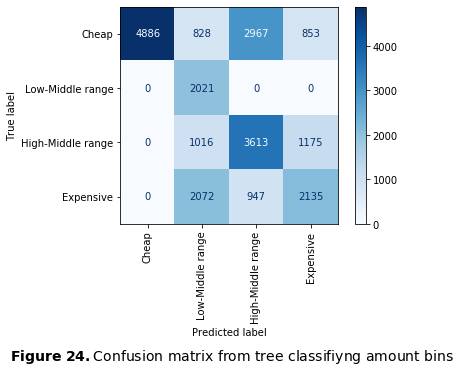

In [53]:
fig = plot_confusion_matrix(model, X_test,y_test, cmap= 'Blues',
                      display_labels=['Cheap', 'Low-Middle range', 'High-Middle range', 'Expensive'],
                     xticks_rotation = 'vertical')

fig_label('Confusion matrix from tree classifiyng amount bins', adj=-0.3)
plt.show()

We see that **the model predicts customers that perform cheap transactions with 100% precision**. Although the precision is much lower for other labels, they still can be used for profiling purposes. For instance customers that spend between \\$1000 and \\$2000 have 51% of chance of being identified by this model.

We can visualize explicitly the tree below for more details on their profiles.

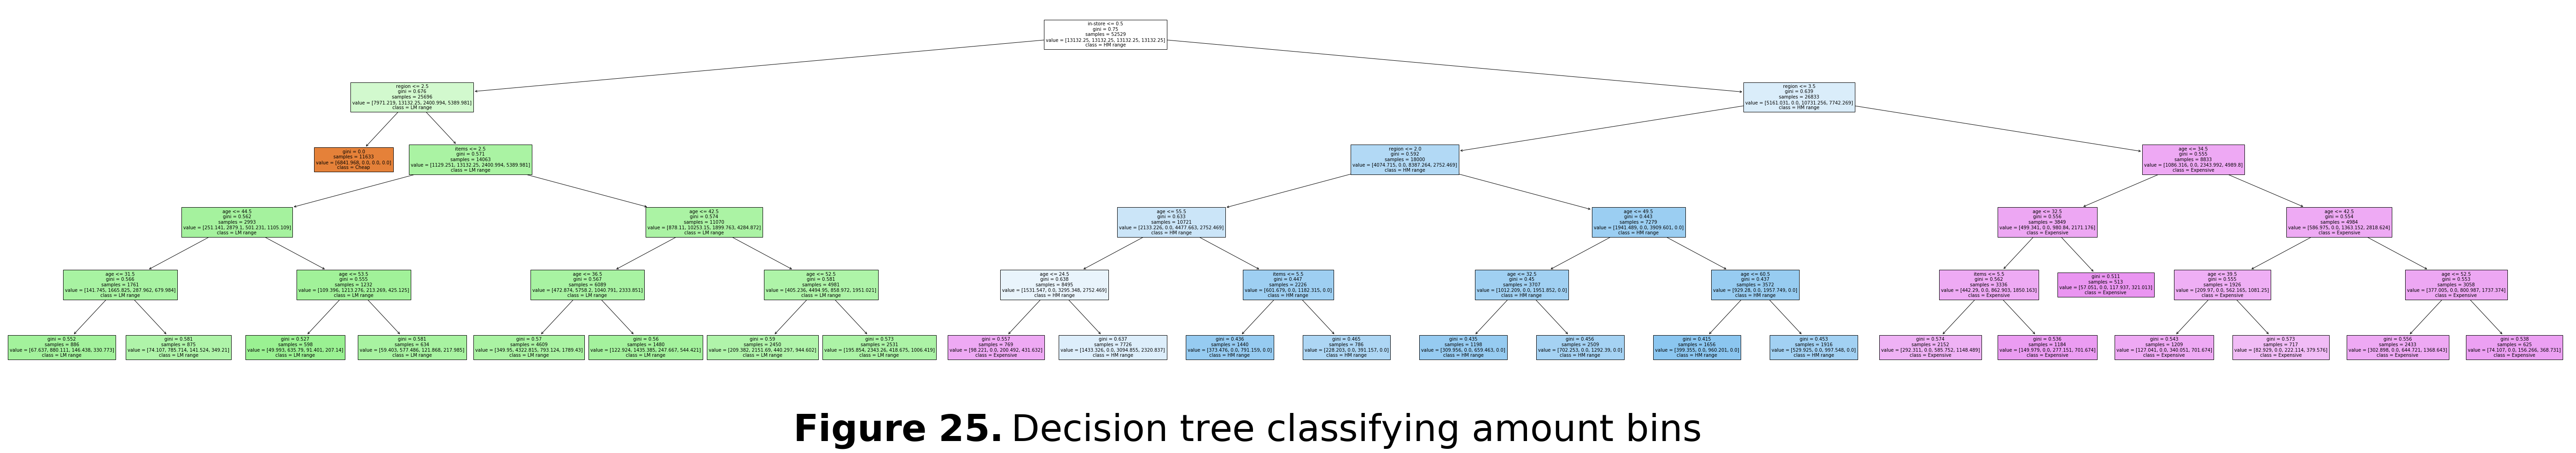

In [54]:
# Plot tree predicting amount bins

plt.figure(figsize=(100,15))
tree = plot_tree(model,
                 feature_names=X_train.columns,
                 class_names=['Cheap', 'LM range', 'HM range', 'Expensive'],
                 filled=True,
                 fontsize =10)

fig_label('Decision tree classifying amount bins', adj=0.05, size=80)
plt.show()

We will also compare importances on the tree above.

In [55]:
importances = pd.DataFrame(data={
    'feature': X_train.columns,
    'importance': model.feature_importances_})
display(importances)

,feature,importance
0,region,0.631108
1,items,0.000517
2,in-store,0.341232
3,age,0.027143


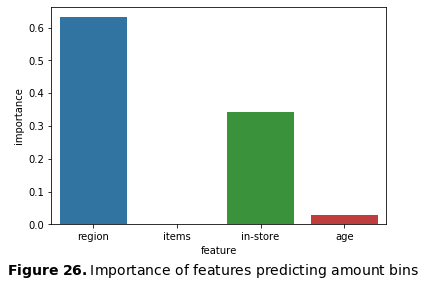

In [56]:
fig = sns.barplot(data=importances, x='feature', y = 'importance')
fig_label('Importance of features predicting amount bins')

We also see that the greatest gains of information are given by `region`  and `in-store` variables with 63.11% and 34% respectively. The other variables are responsible for less than 3% of the resulting classification. 

## 6. Conclusion <a class="anchor" id="section6"></a>


After carrying out the various tests and analysis of the data, we can answer the questions requested by management.

In this project, it was possible to discover meaningful insights about the customers and their purchase behavior. It was also possible to answer the CEO's questions.
* **Do customers in different regions spend more per transaction?** Yes, they do, but it depends on the type of purchase made (online or in-store) and the region. The East and West region's online customers are the ones that do spend more per transaction, followed by the West in-store customers and the North customers (exclusively in-store). Finally, the East in-store clients followed by the South region clients (exclusively online) are the ones that spend less per transaction.
* **Which regions spend the most/least?** The region that spends more is the West region and the one that spends the less is the South region.
* **Is there a relationship between number of items purchased and amount spent?** There is no relationship between the number of items and the amount spent. It was possible to verify that independently of the number of products, the maximum amount spent is 3000.
* **Are there differences in the age of customers between regions?** It was verified some differences between the ages of the customers of each region. In the South region, we can see that we have a uniform distribution, and it’s the only region where the minimum age is almost 30 years old, and it's also the only one with people older than 80 years old. North and East are very similar in age, the youngest people are aged 19 and 18 years respectively, and the oldest is 74 years old. West region is the region that has the youngest age average (39 years old), and the oldest client is 63 years old. This region is missing the older people segment and it should be further analyzed why because with the current data it is not possible to reach a conclusion. **If so, can we predict the age of a customer in a region based on other demographic data?**  I was only capable of predicting the age group with a maximum accuracy of 47.39% (Random Forest Classifier, with 3 bins, with Hyperparameter Tuning and the items, feature removed). It is considered not a great result but is better than random guessing the age, so it is a valid model. 
* **Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?**  Not only age influences where the client makes the purchase. For example, people over 78 years buy exclusively online. This is due to South Region being exclusively online and being the one with older people. Therefore, I  can conclude that the region also affects where the client makes the purchase (South region clients can only buy online while North can only buy in-store). It was possible to predict with an accuracy of 88.70% (Decision Tree Classifier with Hyperparameter Tuning without the items feature).